In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [2]:
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1234)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [3]:
def normalize(data, new_min, new_max):
    data_min = np.min(data)
    data_max = np.max(data)
    # Scale to 0-1
    data_norm = (data - data_min) / (data_max - data_min)
    # Scale to new_min to new_max
    data_scaled = data_norm * (new_max - new_min) + new_min
    return data_scaled

In [4]:
X_train = normalize(X_train, -10, 10)
y_train = normalize(y_train, -10, 10)
X_test = normalize(X_test, -10, 10)
y_test = normalize(y_test, -10, 10)

In [5]:
X_train = np.round(X_train, 4)
y_train = np.round(y_train, 4)
X_test = np.round(X_test, 4)
y_test = np.round(y_test,4)

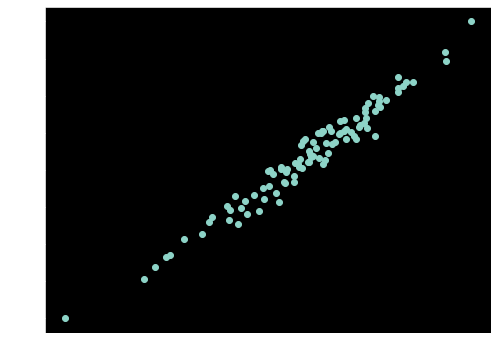

In [6]:
X = normalize(X, -10, 10)
y = normalize(y, -10, 10)
fig=plt.figure(figsize=(8,6))
plt.scatter(X[:,0],y)
plt.show()

In [7]:
X_train[:4]

array([[2.0906],
       [5.2774],
       [2.0306],
       [1.5591]])

In [8]:
y_train[:4]

array([1.0673, 2.2943, 1.2602, 0.7106])

In [9]:
X_train_augmented = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_train_augmented

array([[ 1.0000e+00,  2.0906e+00],
       [ 1.0000e+00,  5.2774e+00],
       [ 1.0000e+00,  2.0306e+00],
       [ 1.0000e+00,  1.5591e+00],
       [ 1.0000e+00,  2.6922e+00],
       [ 1.0000e+00, -2.0311e+00],
       [ 1.0000e+00,  9.1910e-01],
       [ 1.0000e+00,  3.8694e+00],
       [ 1.0000e+00,  8.7132e+00],
       [ 1.0000e+00,  3.0036e+00],
       [ 1.0000e+00,  5.8320e+00],
       [ 1.0000e+00,  6.6446e+00],
       [ 1.0000e+00,  1.2885e+00],
       [ 1.0000e+00,  2.5218e+00],
       [ 1.0000e+00, -1.3031e+00],
       [ 1.0000e+00,  2.1019e+00],
       [ 1.0000e+00,  4.0919e+00],
       [ 1.0000e+00,  5.4823e+00],
       [ 1.0000e+00,  2.6809e+00],
       [ 1.0000e+00, -1.0000e+01],
       [ 1.0000e+00,  4.5467e+00],
       [ 1.0000e+00,  6.7814e+00],
       [ 1.0000e+00,  2.6189e+00],
       [ 1.0000e+00,  5.5261e+00],
       [ 1.0000e+00, -6.0935e+00],
       [ 1.0000e+00,  1.2780e-01],
       [ 1.0000e+00,  1.0000e+01],
       [ 1.0000e+00,  2.0219e+00],
       [ 1.0000e+00,

In [10]:
X_train_T = X_train_augmented.T
X_train_T

array([[ 1.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,
         1.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,
         1.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,
         1.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,
         1.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,
         1.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,
         1.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,
         1.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,
         1.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,
         1.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,
         1.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,
         1.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,
         1.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,
         1.0000e+00,  1.0000e+00,  1.0000e+00,  1.0

In [11]:
XTX=X_train_T.dot(X_train_augmented)
XTX

array([[  80.        ,  161.7329    ],
       [ 161.7329    , 1261.82542855]])

In [12]:
XTY=X_train_T.dot(y_train)
XTY

array([  78.0349    , 1074.01614145])

In [13]:
XTX_inv = np.linalg.inv(XTX)
theta = np.dot(XTX, XTY)

In [14]:
bias = theta[0]
weights = theta[1:]

In [15]:
bias

179946.53720351867

In [16]:
weights

array([1367841.68863297])

In [17]:
predictions=[]
for i in X_test:
    p=i.dot(weights)
    p=p+bias
    predictions.append(p)

In [18]:
for a,b in zip(y_test,predictions):
    print(a,b)

1.2451 5619305.796221404
-2.8304 -1169018.9361263206
4.1462 7281917.368754785
6.4176 11331686.256290432
-10.0 -13498470.349126225
3.5048 7965564.644733546
-4.4055 -3169760.9740897724
2.5218 4674400.757713746
2.0253 5936234.715477665
3.1638 4302074.250067851
-3.0966 -3393129.521843537
3.4313 9126725.454214077
7.201 10527258.559205381
5.6966 9123032.28165477
-1.068 1070548.2606724482
5.3297 7335947.115455788
6.9866 11652855.484781455
-4.7406 -7044856.47798699
10.0 13858363.423533263
6.7727 10172987.56184944
